<a href="https://colab.research.google.com/github/sivaram9899/sivaramAML/blob/main/Assignment_4_Text%26Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4 - Text and Sequence Data using IMDB dataset**

# **Name: KUMAR NAGA SIVARAM**



In [ ]:
!pip install tensorflow==2.12 #installing the 2.12 version because google colab uses this version

**Loading the important libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True

**Importing TensorFlow and Keras:**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

#### Considering the IMDB example from Chapter 6. Re-running the example and modifying the  by **implementing a cutoff for reviews after 150 words, Validation Sample - 10000, Consider only the top 10,000 words**

### **Model 1: Basic model just using embedded layer with  Training Sample - 100**

**Creating the training sample with 100 obs , validation with 10,000 obs and test with 5000 obs**

In [ ]:
num_words = 10000
maxlen = 150

# Loading the IMDB dataset with a vocabulary size limit
(train_reviews, train_sentiments), (test_reviews, test_sentiments) = imdb.load_data(num_words=num_words)

# Padding sequences to ensure uniform length
padded_train_reviews = pad_sequences(train_reviews, maxlen=maxlen)
padded_test_reviews = pad_sequences(test_reviews, maxlen=maxlen)

# Combining the Training and Testing data to create the full dataset
all_reviews = np.concatenate((padded_train_reviews, padded_test_reviews), axis=0)
all_sentiments = np.concatenate((train_sentiments, test_sentiments), axis=0)

# Splitting the data into Training and Validation samples
train_samples, validation_samples, train_labels, validation_labels = train_test_split(
    all_reviews, all_sentiments, train_size=100, test_size=10000, random_state=42, stratify=all_sentiments
)

# Further splitting the data to create a test set of 5000 samples
_, final_test_samples, _, final_test_labels = train_test_split(
    padded_test_reviews, test_sentiments, test_size=5000, random_state=42, stratify=test_sentiments
)


In [ ]:
train_samples.shape

(100, 150)

In [ ]:
validation_samples.shape

(10000, 150)

In [ ]:
final_test_samples.shape

(5000, 150)

**Model Building** :

In [ ]:
sentiment_model = Sequential()
sentiment_model.add(Embedding(input_dim=10000, output_dim=8, input_length=maxlen))
sentiment_model.add(Flatten())
sentiment_model.add(Dense(units=1, activation='sigmoid'))
sentiment_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
sentiment_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


**Model Execution**

In [ ]:
# Setting up Callbacks
checkpoint_callback = ModelCheckpoint(
    filepath="sentiment_model_best.h5",
    save_best_only=True,
    monitor="val_loss"
)

# Fitting the Model - Training the Sentiment Analysis Model
sentiment_model_training = sentiment_model.fit(
    train_samples, train_labels,
    epochs=30,
    batch_size=32,
    validation_data=(validation_samples, validation_labels),
    callbacks=[checkpoint_callback]
)


Epoch 1/30
4/4 [==============================] - 1s 171ms/step - loss: 0.6954 - accuracy: 0.4900 - val_loss: 0.6936 - val_accuracy: 0.4944
Epoch 2/30
4/4 [==============================] - 0s 108ms/step - loss: 0.6734 - accuracy: 0.8300 - val_loss: 0.6935 - val_accuracy: 0.4982
Epoch 3/30
4/4 [==============================] - 0s 111ms/step - loss: 0.6584 - accuracy: 0.9300 - val_loss: 0.6935 - val_accuracy: 0.5001
Epoch 4/30
4/4 [==============================] - 0s 108ms/step - loss: 0.6446 - accuracy: 0.9800 - val_loss: 0.6935 - val_accuracy: 0.5008
Epoch 5/30
4/4 [==============================] - 0s 113ms/step - loss: 0.6317 - accuracy: 0.9800 - val_loss: 0.6934 - val_accuracy: 0.4996
Epoch 6/30
4/4 [==============================] - 0s 108ms/step - loss: 0.6186 - accuracy: 0.9900 - val_loss: 0.6933 - val_accuracy: 0.5029
Epoch 7/30
4/4 [==============================] - 0s 104ms/step - loss: 0.6054 - accuracy: 0.9900 - val_loss: 0.6934 - val_accuracy: 0.5021
Epoch 8/30
4/4 [====

**For training and validation, ploating the accuracy and loss**

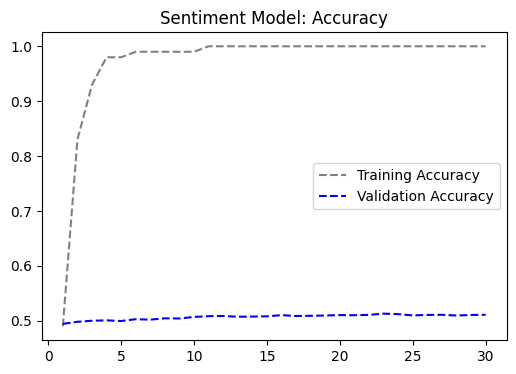

<Figure size 640x480 with 0 Axes>

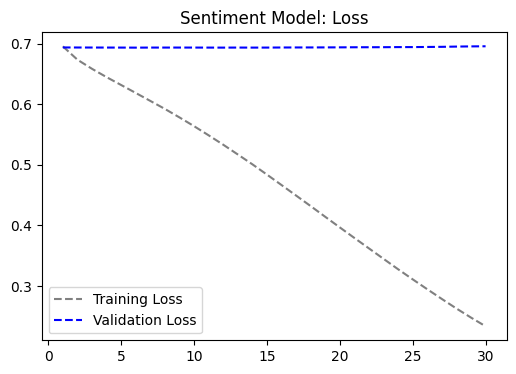

In [ ]:
# Extracting accuracy and loss values for training and validation
train_accuracy = sentiment_model_training.history['accuracy']
val_accuracy = sentiment_model_training.history['val_accuracy']

train_loss = sentiment_model_training.history["loss"]
val_loss = sentiment_model_training.history["val_loss"]

epochs = range(1, len(train_accuracy) + 1)

# Plotting the accuracy for training and validation
plt.figure(figsize=(6,4))
plt.plot(epochs, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Sentiment Model: Accuracy")
plt.legend()
plt.figure()

# Plotting the loss for training and validation
plt.figure(figsize=(6,4))
plt.plot(epochs, train_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Sentiment Model: Loss")
plt.legend()
plt.show()


In [ ]:
# Loading the trained model from the saved file
loaded_sentiment_model = load_model('sentiment_model_best.h5')

# Evaluating the model on the test data
evaluation_results = loaded_sentiment_model.evaluate(final_test_samples, final_test_labels)

# Printing the loss and accuracy from the evaluation
print(f'Loss: {evaluation_results[0]:.3f}')
print(f'Accuracy: {evaluation_results[1]:.3f}')


157/157 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5070
Loss: 0.693
Accuracy: 0.507


The model with 100 training samples which was built with just an embedding layer resulted in 50.6% Accuracy, which is not that bad because the model was just trained with 100 Samples.Further we will use the same model architecture and we will increase the

### **Model 2: Basic model just using embedded layer with Training Sample - 5,000**

In [ ]:
num_words = 10000
maxlen = 150

# Loading the IMDB dataset with a vocabulary size limit
(train_reviews, train_sentiments), (test_reviews, test_sentiments) = imdb.load_data(num_words=num_words)

# Padding sequences to ensure uniform length
padded_train_reviews = pad_sequences(train_reviews, maxlen=maxlen)
padded_test_reviews = pad_sequences(test_reviews, maxlen=maxlen)

# Combining the Training and Testing data to create the full dataset
all_reviews = np.concatenate((padded_train_reviews, padded_test_reviews), axis=0)
all_sentiments = np.concatenate((train_sentiments, test_sentiments), axis=0)

# Splitting the data into Training and Validation samples
train_samples, validation_samples, train_labels, validation_labels = train_test_split(
    all_reviews, all_sentiments, train_size=5000, test_size=10000, random_state=42, stratify=all_sentiments
)

# Further splitting the data to create a test set of 5000 samples
_, final_test_samples, _, final_test_labels = train_test_split(
    padded_test_reviews, test_sentiments, test_size=5000, random_state=42, stratify=test_sentiments
)


In [ ]:
train_samples.shape


(5000, 150)

In [ ]:
validation_samples.shape

(10000, 150)

In [ ]:
final_test_samples.shape

(5000, 150)

**Model Construction** :

In [ ]:
# Defining the Sequential model for sentiment analysis
sentiment_model = Sequential()

# Adding an embedding layer with a vocabulary size of 10,000, 8-dimensional vectors, and a fixed input length
sentiment_model.add(Embedding(input_dim=10000, output_dim=8, input_length=maxlen))

# Flattening the output of the embedding layer to a 1D array
sentiment_model.add(Flatten())

# Adding a dense output layer with a sigmoid activation function for binary classification
sentiment_model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model with RMSprop optimizer, binary cross-entropy loss, and accuracy metric
sentiment_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Summarizing the model architecture
sentiment_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Setting up callbacks to save the best model based on validation loss
checkpoint_callback = ModelCheckpoint(
    filepath="sentiment_model_v2.h5",   # Path where the model will be saved
    save_best_only=True,                 # Save only the best model
    monitor="val_loss"                   # Monitor validation loss for best model
)

# Fitting the model to the training data and validating on the validation set
sentiment_model_training_v2 = sentiment_model.fit(
    train_samples, train_labels,         # Training data and labels
    epochs=30,                           # Number of epochs
    batch_size=32,                       # Batch size for training
    validation_data=(validation_samples, validation_labels),  # Validation data
    callbacks=[checkpoint_callback]      # Using the defined callbacks
)


Epoch 1/30
157/157 [==============================] - 1s 5ms/step - loss: 0.6915 - accuracy: 0.5252 - val_loss: 0.6869 - val_accuracy: 0.5834
Epoch 2/30
157/157 [==============================] - 1s 4ms/step - loss: 0.6502 - accuracy: 0.7546 - val_loss: 0.6349 - val_accuracy: 0.6937
Epoch 3/30
157/157 [==============================] - 1s 4ms/step - loss: 0.5421 - accuracy: 0.8212 - val_loss: 0.5319 - val_accuracy: 0.7760
Epoch 4/30
157/157 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8744 - val_loss: 0.4467 - val_accuracy: 0.8159
Epoch 5/30
157/157 [==============================] - 1s 4ms/step - loss: 0.3162 - accuracy: 0.9060 - val_loss: 0.4018 - val_accuracy: 0.8292
Epoch 6/30
157/157 [==============================] - 1s 4ms/step - loss: 0.2494 - accuracy: 0.9272 - val_loss: 0.3756 - val_accuracy: 0.8384
Epoch 7/30
157/157 [==============================] - 1s 4ms/step - loss: 0.2006 - accuracy: 0.9430 - val_loss: 0.3679 - val_accuracy: 0.8385
Epoch 

**For training and validation, ploating the accuracy and loss**

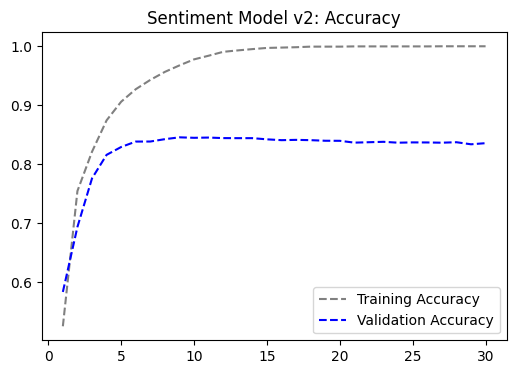

<Figure size 640x480 with 0 Axes>

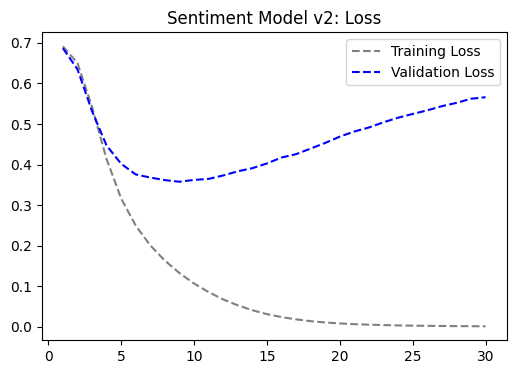

In [ ]:
# Extracting accuracy and loss values for training and validation from the second model
train_accuracy_v2 = sentiment_model_training_v2.history['accuracy']
val_accuracy_v2 = sentiment_model_training_v2.history['val_accuracy']

train_loss_v2 = sentiment_model_training_v2.history["loss"]
val_loss_v2 = sentiment_model_training_v2.history["val_loss"]

# Defining the range of epochs for plotting
epochs_v2 = range(1, len(train_accuracy_v2) + 1)

# Plotting the accuracy for training and validation
plt.figure(figsize=(6, 4))
plt.plot(epochs_v2, train_accuracy_v2, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_v2, val_accuracy_v2, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Sentiment Model v2: Accuracy")
plt.legend()
plt.figure()

# Plotting the loss for training and validation
plt.figure(figsize=(6, 4))
plt.plot(epochs_v2, train_loss_v2, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_v2, val_loss_v2, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Sentiment Model v2: Loss")
plt.legend()
plt.show()


In [ ]:
# Loading the second model from the saved file
loaded_sentiment_model_v2 = load_model('sentiment_model_v2.h5')

# Evaluating the model on the test data
evaluation_results_v2 = loaded_sentiment_model_v2.evaluate(final_test_samples, final_test_labels)

# Printing the loss and accuracy from the evaluation
print(f'Loss: {evaluation_results_v2[0]:.3f}')
print(f'Accuracy: {evaluation_results_v2[1]:.3f}')


157/157 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8688
Loss: 0.314
Accuracy: 0.869


### **Model 3: Basic model just using embedded layer with Training Sample - 10,000**

In [ ]:
num_words = 10000
maxlen = 150

# Loading the IMDB dataset with a vocabulary size limit
(train_reviews, train_sentiments), (test_reviews, test_sentiments) = imdb.load_data(num_words=num_words)

# Padding sequences to ensure uniform length
padded_train_reviews = pad_sequences(train_reviews, maxlen=maxlen)
padded_test_reviews = pad_sequences(test_reviews, maxlen=maxlen)

# Combining the Training and Testing data to create the full dataset
all_reviews = np.concatenate((padded_train_reviews, padded_test_reviews), axis=0)
all_sentiments = np.concatenate((train_sentiments, test_sentiments), axis=0)

# Splitting the data into Training and Validation samples
train_samples, validation_samples, train_labels, validation_labels = train_test_split(
    all_reviews, all_sentiments, train_size=10000, test_size=10000, random_state=42, stratify=all_sentiments
)

# Further splitting the data to create a test set of 5000 samples
_, final_test_samples, _, final_test_labels = train_test_split(
    padded_test_reviews, test_sentiments, test_size=5000, random_state=42, stratify=test_sentiments
)


In [ ]:
train_samples.shape


(10000, 150)

In [ ]:
validation_samples.shape


(10000, 150)

In [ ]:
final_test_samples.shape

(5000, 150)

**Model Building** :

In [ ]:
# Defining a Sequential model for sentiment analysis
sentiment_analysis_model = Sequential()

# Adding an embedding layer with a vocabulary size of 10,000, 8-dimensional embedding vectors, and a fixed input length
sentiment_analysis_model.add(Embedding(input_dim=10000, output_dim=8, input_length=maxlen))

# Flattening the 2D output of the embedding layer to a 1D vector
sentiment_analysis_model.add(Flatten())

# Adding a dense output layer with a sigmoid activation function for binary classification (positive/negative sentiment)
sentiment_analysis_model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model with RMSprop optimizer, binary cross-entropy loss, and accuracy as the evaluation metric
sentiment_analysis_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Displaying the model summary to view the layers and parameters
sentiment_analysis_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Setting up callbacks to save the best model based on validation loss
checkpoint_callback_v3 = ModelCheckpoint(
    filepath="sentiment_model_v3.h5",  # Path to save the model
    save_best_only=True,               # Save only the model with the best performance on validation data
    monitor="val_loss"                 # Monitor validation loss to determine the best model
)

# Fitting the model to the training data and validating it on the validation set
sentiment_model_training_v3 = sentiment_analysis_model.fit(
    train_samples, train_labels,         # Training data and labels
    epochs=30,                           # Number of epochs to train the model
    batch_size=32,                       # Batch size for each training step
    validation_data=(validation_samples, validation_labels),  # Validation data for evaluating performance during training
    callbacks=[checkpoint_callback_v3]   # Using the defined callback for model checkpointing
)


Epoch 1/30
313/313 [==============================] - 1s 3ms/step - loss: 0.6829 - accuracy: 0.5805 - val_loss: 0.6483 - val_accuracy: 0.6890
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 0.5227 - accuracy: 0.8066 - val_loss: 0.4447 - val_accuracy: 0.8234
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 0.3487 - accuracy: 0.8736 - val_loss: 0.3605 - val_accuracy: 0.8502
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 0.2714 - accuracy: 0.8988 - val_loss: 0.3333 - val_accuracy: 0.8578
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 0.2255 - accuracy: 0.9199 - val_loss: 0.3220 - val_accuracy: 0.8649
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 0.1903 - accuracy: 0.9347 - val_loss: 0.3210 - val_accuracy: 0.8632
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 0.1623 - accuracy: 0.9468 - val_loss: 0.3222 - val_accuracy: 0.8646
Epoch 

**Calculating the accuracy and loss for training and proofing**

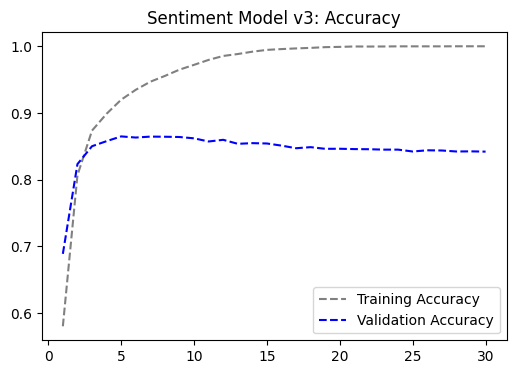

<Figure size 640x480 with 0 Axes>

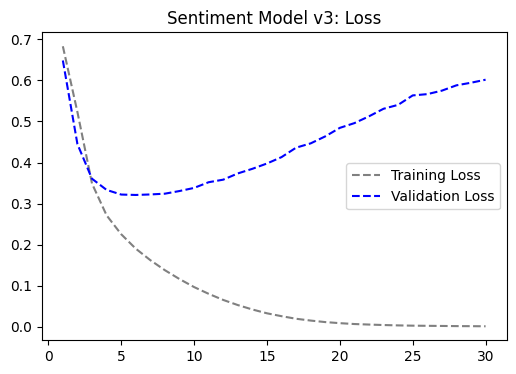

In [ ]:
# Extracting accuracy and loss values for training and validation from the third model's training history
train_accuracy_v3 = sentiment_model_training_v3.history['accuracy']
val_accuracy_v3 = sentiment_model_training_v3.history['val_accuracy']

train_loss_v3 = sentiment_model_training_v3.history["loss"]
val_loss_v3 = sentiment_model_training_v3.history["val_loss"]

# Defining the range of epochs for plotting
epochs_v3 = range(1, len(train_accuracy_v3) + 1)

# Plotting the accuracy for training and validation
plt.figure(figsize=(6, 4))
plt.plot(epochs_v3, train_accuracy_v3, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_v3, val_accuracy_v3, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Sentiment Model v3: Accuracy")
plt.legend()
plt.figure()

# Plotting the loss for training and validation
plt.figure(figsize=(6, 4))
plt.plot(epochs_v3, train_loss_v3, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_v3, val_loss_v3, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Sentiment Model v3: Loss")
plt.legend()
plt.show()


In [ ]:
# Loading the third model from the saved file
loaded_sentiment_model_v3 = load_model('sentiment_model_v3.h5')

# Evaluating the model on the final test dataset
evaluation_results_v3 = loaded_sentiment_model_v3.evaluate(final_test_samples, final_test_labels)

# Printing the loss and accuracy from the evaluation
print(f'Loss: {evaluation_results_v3[0]:.3f}')
print(f'Accuracy: {evaluation_results_v3[1]:.3f}')


157/157 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.8816
Loss: 0.286
Accuracy: 0.882


A significant pattern showed up when we experimented with three basic simple sequence models with embedded layers and varying training sample sizes: more training samples were associated with better model accuracy and lower loss. To be precise, the model trained on 10,000 samples showed a notable improvement with 87.8% accuracy and 27.9% loss, while the model trained on 100 samples showed 50.6% accuracy and 69.7% loss.



### **Model 4: Using convolution 1D and Embedding layer together with training sample size as 10,000**

To find out how this combination will affect the model's accuracy with the same training sample size (10,000), use Convolution 1D.We added MaxPooling and Dropout layers to reduce overfitting. By choosing the most important information from the convolved feature, MaxPooling helps in feature extraction and lowers the chance of overfitting by down-sampling the input's spatial dimensions and concentrating on the most noticeable features.


**Model Building** :

In [ ]:
# Defining a Sequential model for text classification with convolutional layers
text_classification_model = Sequential()

# Setting the maximum sequence length
max_sequence_length = 150

# Adding an embedding layer with a vocabulary size of 10,000 and 8-dimensional embedding vectors
text_classification_model.add(Embedding(input_dim=10000, output_dim=8, input_length=max_sequence_length))

# Adding convolutional layers with max-pooling for feature extraction
text_classification_model.add(Conv1D(512, 3, activation='relu'))  # First convolutional layer with 512 filters
text_classification_model.add(MaxPooling1D(3))  # Max-pooling layer

text_classification_model.add(Conv1D(256, 3, activation='relu'))  # Second convolutional layer with 256 filters
text_classification_model.add(MaxPooling1D(3))  # Max-pooling layer

text_classification_model.add(Conv1D(256, 3, activation='relu'))  # Third convolutional layer with 256 filters
text_classification_model.add(Dropout(0.8))  # Dropout layer to prevent overfitting
text_classification_model.add(MaxPooling1D(3))  # Max-pooling layer

# Adding a global max-pooling layer to reduce the dimensionality
text_classification_model.add(GlobalMaxPooling1D())

# Adding a fully connected dense layer
text_classification_model.add(Dense(256, activation='relu'))

# Adding the output layer with a sigmoid activation function for binary classification
text_classification_model.add(Dense(1, activation='sigmoid'))

# Compiling the model with the Adam optimizer and binary cross-entropy loss
adam_optimizer = keras.optimizers.Adam(learning_rate=0.0001)
text_classification_model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Displaying the model summary to see the layer details
text_classification_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 conv1d (Conv1D)             (None, 148, 512)          12800     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 256)          

In [ ]:
# Setting up a callback to save the best model based on validation loss
checkpoint_callback_v4 = ModelCheckpoint(
    filepath="text_classification_model_v4.h5",  # Path to save the best model
    save_best_only=True,                        # Only save the model if its performance improves on validation data
    monitor="val_loss"                          # Monitor the validation loss for determining the best model
)

# Training the model on the training data and validating it using the validation set
text_classification_model_training_v4 = text_classification_model.fit(
    train_samples, train_labels,               # Training data and corresponding labels
    epochs=30,                                 # Number of training epochs
    batch_size=32,                             # Batch size for training
    validation_data=(validation_samples, validation_labels),  # Validation data and labels
    callbacks=[checkpoint_callback_v4]         # Using the callback to save the best model during training
)


Epoch 1/30
313/313 [==============================] - 14s 42ms/step - loss: 0.6928 - accuracy: 0.5109 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/30
313/313 [==============================] - 13s 43ms/step - loss: 0.6746 - accuracy: 0.5693 - val_loss: 0.6579 - val_accuracy: 0.6947
Epoch 3/30
313/313 [==============================] - 13s 41ms/step - loss: 0.4715 - accuracy: 0.7732 - val_loss: 0.5510 - val_accuracy: 0.7900
Epoch 4/30
313/313 [==============================] - 13s 42ms/step - loss: 0.3435 - accuracy: 0.8521 - val_loss: 0.5179 - val_accuracy: 0.8059
Epoch 5/30
313/313 [==============================] - 13s 42ms/step - loss: 0.2767 - accuracy: 0.8868 - val_loss: 0.4912 - val_accuracy: 0.7931
Epoch 6/30
313/313 [==============================] - 13s 41ms/step - loss: 0.2311 - accuracy: 0.9096 - val_loss: 0.4676 - val_accuracy: 0.8037
Epoch 7/30
313/313 [==============================] - 13s 41ms/step - loss: 0.1884 - accuracy: 0.9316 - val_loss: 0.4577 - val_accuracy:

**Calculating the accuracy and loss for training and proofing**

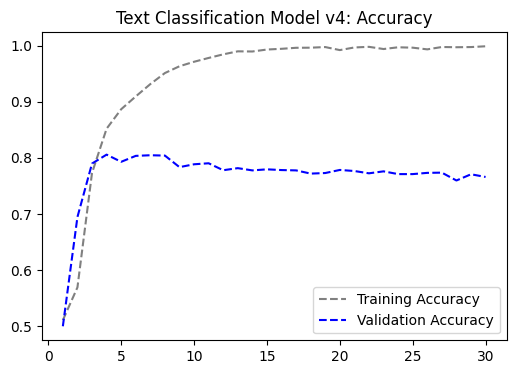

<Figure size 640x480 with 0 Axes>

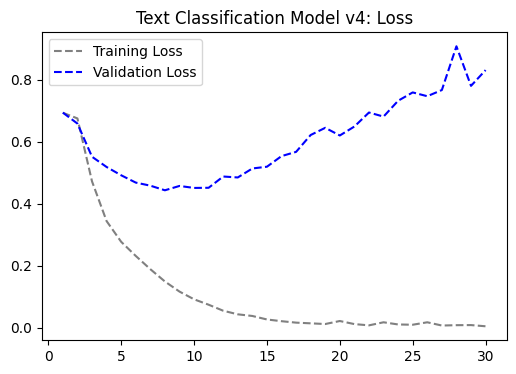

In [ ]:
# Extracting the accuracy and loss values for training and validation from the fourth model's training history
train_accuracy_v4 = text_classification_model_training_v4.history['accuracy']
val_accuracy_v4 = text_classification_model_training_v4.history['val_accuracy']

train_loss_v4 = text_classification_model_training_v4.history["loss"]
val_loss_v4 = text_classification_model_training_v4.history["val_loss"]

# Defining the range of epochs for plotting
epochs_v4 = range(1, len(train_accuracy_v4) + 1)

# Plotting the training and validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(epochs_v4, train_accuracy_v4, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_v4, val_accuracy_v4, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Text Classification Model v4: Accuracy")
plt.legend()
plt.figure()

# Plotting the training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(epochs_v4, train_loss_v4, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_v4, val_loss_v4, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Text Classification Model v4: Loss")
plt.legend()
plt.show()


In [ ]:
# Loading the fourth version of the model from the saved file
loaded_model_v4 = load_model('text_classification_model_v4.h5')

# Evaluating the loaded model on the test dataset
evaluation_results_v4 = loaded_model_v4.evaluate(final_test_samples, final_test_labels)

# Printing the evaluation results: Loss and Accuracy
print(f'Test Loss: {evaluation_results_v4[0]:.3f}')
print(f'Test Accuracy: {evaluation_results_v4[1]:.3f}')


157/157 [==============================] - 2s 10ms/step - loss: 0.4034 - accuracy: 0.8400
Test Loss: 0.403
Test Accuracy: 0.840


As we can see, adding the 1D convolution reduced the model's accuracy from 87.8% to 84.4%, which may be explained by language's natural sequential structure. CNNs are perfect for jobs where input order is immaterial, like picture identification, because they are excellent at identifying local patterns in data. But sentiment analysis necessitates a sophisticated understanding of the relational and contextual subtleties between words in a sentence, which includes identifying long-range relationships. Recurrent neural networks (RNNs) and other similar architectures are therefore thought to be more suited for sentiment analysis tasks because of their capacity to manage sequential data.


### **Model:5 A sequence model built on one-hot encoded vector sequences with LSTM**

Since one hot encoded vector sequence is the best architecture for text and sequence data, we shall use it here. Natural language processing (NLP) uses this method to express categorical data. Words or tokens can be converted into binary value vectors using this method, in which each word is represented by a distinct vector with one element set to 1 (hot) and all other elements set to 0 (cold).


**Model Construction** :

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Setting parameters for the model
max_sequence_length = 150  # Maximum length of input sequences
vocabulary_size = 10000    # Number of tokens in the vocabulary

# Defining the input layer with variable sequence length
input_layer = keras.Input(shape=(None,), dtype="int64")

# Applying one-hot encoding to the input sequences
embedded_sequences = tf.one_hot(input_layer, depth=vocabulary_size)

# Adding a bidirectional LSTM layer with 32 units
bi_lstm_layer = layers.Bidirectional(layers.LSTM(32))(embedded_sequences)

# Adding a dropout layer to prevent overfitting
dropout_layer = layers.Dropout(0.5)(bi_lstm_layer)

# Adding a dense layer with a sigmoid activation function for binary classification
output_layer = layers.Dense(1, activation="sigmoid")(dropout_layer)

# Defining the model with the input and output layers
binary_classification_model = keras.Model(input_layer, output_layer)

# Compiling the model with RMSprop optimizer and binary crossentropy loss
binary_classification_model.compile(optimizer="rmsprop",
                                     loss="binary_crossentropy",
                                     metrics=["accuracy"])

# Displaying the model summary
binary_classification_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, None, 10000)       0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               2568448   
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,568,513
Trainable params: 2,568,513
Non-trainable params: 0
___________________________________________________

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Set parameters
max_length = 150
max_tokens = 10000
num_words = 10000

# Load IMDB dataset (or another dataset if you prefer)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform input length
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)

# Combining the Training and Testing data to create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Split data into training, validation, and testing sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=10000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

# Define the model architecture
inputs = tf.keras.Input(shape=(None,), dtype="int64")
embedded = tf.one_hot(inputs, depth=max_tokens)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Print the model summary to confirm architecture
model.summary()

# Setting up a callback to save the best model based on validation loss
best_model_checkpoint = ModelCheckpoint(
    filepath="best_model_v5.h5",  # File path to save the best model
    save_best_only=True,          # Save only the best model based on validation loss
    monitor="val_loss"            # Monitor validation loss to track improvements
)

# Training the model using the training data and validation data
trained_model_v5 = model.fit(
    train_texts, train_labels,                 # Input training data and their corresponding labels
    epochs=30,                                 # Total number of training epochs
    batch_size=32,                             # Number of samples per gradient update
    validation_data=(val_texts, val_labels),   # Validation data and labels
    callbacks=[best_model_checkpoint]          # Save the best model during training
)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot_2 (TFOpLambda)   (None, None, 10000)       0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               2568448   
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,568,513
Trainable params: 2,568,513
Non-trainable params: 0
_________________________________________________

**For training and validation, ploating the accuracy and loss**

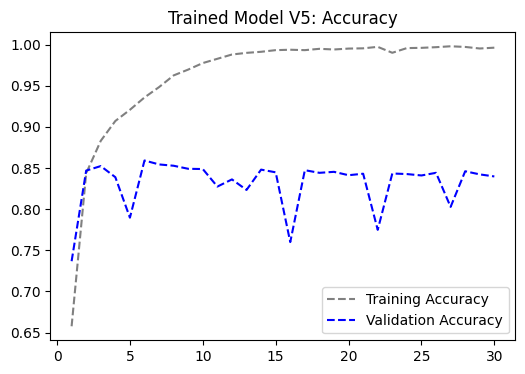

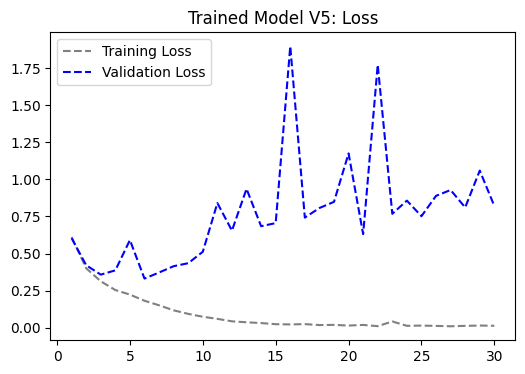

In [ ]:
# Extracting training and validation metrics from Model_5's history
train_accuracy = trained_model_v5.history['accuracy']  # Training accuracy over epochs
val_accuracy = trained_model_v5.history['val_accuracy']  # Validation accuracy over epochs

train_loss = trained_model_v5.history["loss"]  # Training loss over epochs
val_loss = trained_model_v5.history["val_loss"]  # Validation loss over epochs

# Defining the range of epochs
epochs_range = range(1, len(train_accuracy) + 1)

# Plotting accuracy graph
plt.figure(figsize=(6, 4))  # Set figure size
plt.plot(epochs_range, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")  # Training accuracy
plt.plot(epochs_range, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")  # Validation accuracy
plt.title("Trained Model V5: Accuracy")  # Title for the accuracy plot
plt.legend()  # Adding a legend for the plot
plt.show()  # Display the plot

# Plotting loss graph
plt.figure(figsize=(6, 4))  # Set figure size
plt.plot(epochs_range, train_loss, color="grey", linestyle="dashed", label="Training Loss")  # Training loss
plt.plot(epochs_range, val_loss, color="blue", linestyle="dashed", label="Validation Loss")  # Validation loss
plt.title("Trained Model V5: Loss")  # Title for the loss plot
plt.legend()  # Adding a legend for the plot
plt.show()  # Display the plot


In [ ]:
# Loading the saved best model from the checkpoint file
best_trained_model_v5 = load_model('best_model_v5.h5')  # Load the model saved during training

# Evaluating the model on the test dataset
test_results_v5 = best_trained_model_v5.evaluate(
    test_texts,  # Test input data
    test_labels  # Test labels
)

# Printing the evaluation results
print(f"Test Loss: {test_results_v5[0]:.3f}")  # Test loss
print(f"Test Accuracy: {test_results_v5[1]:.3f}")  # Test accuracy


157/157 [==============================] - 47s 293ms/step - loss: 0.2966 - accuracy: 0.8736
Test Loss: 0.297
Test Accuracy: 0.874


As we can see, the model's accuracy is at its highest point to yet, at 88.6%, with a training sample size of 10,000. Investigating the effects of combining an embedding layer and an LSTM model is the next stage. The purpose of this study is to assess the effects of adding an LSTM with embedding layer, which is well-known for its ability to capture sequential dependencies, on the overall performance of the model.


### **Model 6: LSTM using embedded layer with Training Sample - 10,000**

**Model Construction** :

In [ ]:
# Defining parameters for the model
max_sequence_length = 150  # Maximum length of input sequences
vocabulary_size = 10000    # Maximum number of tokens in the vocabulary

# Input layer to accept integer sequences
model_input = keras.Input(shape=(None,), dtype="int64", name="Input_Layer")

# Embedding layer to learn dense representations for the tokens
embedding_layer = layers.Embedding(
    input_dim=vocabulary_size,      # Size of the vocabulary
    output_dim=256                  # Dimensionality of the embedding space
)(model_input)

# Bidirectional LSTM layer for sequential data processing
bidirectional_lstm = layers.Bidirectional(
    layers.LSTM(32)                 # LSTM with 32 units
)(embedding_layer)

# Dropout layer to prevent overfitting
dropout_layer = layers.Dropout(0.5)(bidirectional_lstm)

# Output layer with a single neuron for binary classification
model_output = layers.Dense(
    1,                              # Single output unit
    activation="sigmoid",           # Sigmoid activation for probability output
    name="Output_Layer"
)(dropout_layer)

# Creating the final model
text_classification_model = keras.Model(
    inputs=model_input,             # Defining the input to the model
    outputs=model_output,           # Defining the output of the model
    name="Text_Classification_Model"
)

# Compiling the model with optimizer, loss function, and evaluation metrics
text_classification_model.compile(
    optimizer="rmsprop",            # Optimizer for gradient descent
    loss="binary_crossentropy",     # Loss function for binary classification
    metrics=["accuracy"]            # Evaluation metric
)

# Displaying the model's architecture
text_classification_model.summary()


Model: "Text_Classification_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, None)]            0         
                                                                 
 embedding_4 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 Output_Layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 2,634,049
Trainable params: 2,634,049
Non-trainable params: 0
_______________________________

In [ ]:
# Setting up a callback to save the best model based on validation loss
best_model_callback_v6 = ModelCheckpoint(
    filepath="best_model_v6.h5",  # File path to save the best model
    save_best_only=True,          # Save only if the current model has the best validation loss
    monitor="val_loss",           # Monitor the validation loss during training
    mode="min",                   # Save the model with the minimum validation loss
    verbose=1                     # Display a message when the model is saved
)

# Training the model using the training data and validation data
trained_model_v6 = model.fit(                 # Referencing the model defined earlier
    train_texts,                             # Input training data (aligned with previous variable names)
    train_labels,                            # Corresponding labels for the training data
    epochs=10,                               # Total number of epochs for training
    batch_size=32,                           # Number of samples per gradient update
    validation_data=(val_texts, val_labels),  # Validation data and their labels (aligned variable names)
    callbacks=[best_model_callback_v6]        # Save the best model based on validation loss
)


Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9969
Epoch 1: val_loss improved from inf to 0.71099, saving model to best_model_v6.h5
313/313 [==============================] - 254s 813ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.7110 - val_accuracy: 0.8475
Epoch 2/10
313/313 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9973
Epoch 2: val_loss did not improve from 0.71099
313/313 [==============================] - 252s 804ms/step - loss: 0.0135 - accuracy: 0.9973 - val_loss: 0.8676 - val_accuracy: 0.8398
Epoch 3/10
313/313 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9966
Epoch 3: val_loss did not improve from 0.71099
313/313 [==============================] - 252s 806ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.9081 - val_accuracy: 0.8420
Epoch 4/10
313/313 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9967
Epoch 4: val_loss did not improve fr

**Ploating the Accuracy and loss for training and validation**

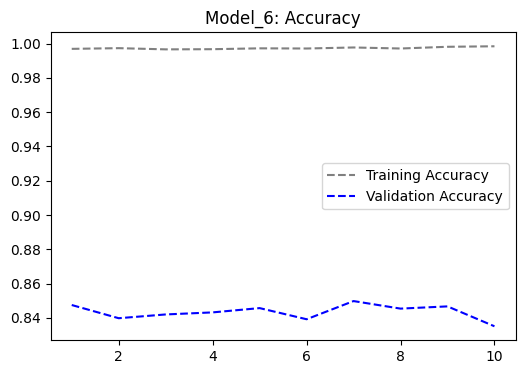

<Figure size 640x480 with 0 Axes>

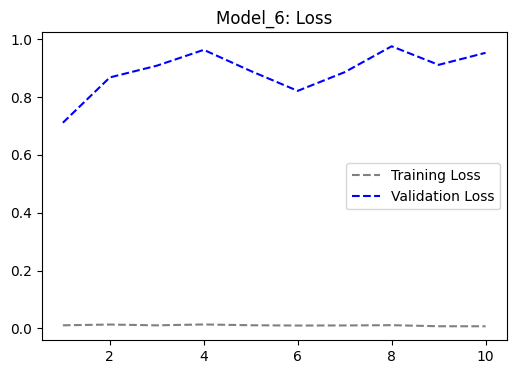

In [ ]:
# Extracting accuracy and loss from the history of trained model
accuracy = trained_model_v6.history['accuracy']
val_accuracy = trained_model_v6.history['val_accuracy']

loss = trained_model_v6.history['loss']
val_loss = trained_model_v6.history['val_loss']

# Defining the number of epochs for plotting
epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy of the model
plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model_6: Accuracy")
plt.legend()
plt.figure()

# Plotting the loss of the model
plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_6: Loss")
plt.legend()
plt.show()


In [ ]:
# Loading the best model (model6) from file
test_model_v6 = load_model('best_model_v6.h5')

# Evaluating the model on the test data
Model6_Results = test_model_v6.evaluate(test_texts, test_labels)

# Printing the loss and accuracy of the model on the test data
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')


157/157 [==============================] - 44s 275ms/step - loss: 0.5778 - accuracy: 0.8750
Loss: 0.578
Accuracy: 0.875


### **Model 6.1: LSTM using embedded layer with Training Sample - 20,000**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import numpy as np

# Define the maximum number of words and sequence length
num_words = 10000
maxlen = 150

# Load IMDB dataset with the top 'num_words' words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Pad the sequences to ensure a consistent input size
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the train and test data into a single dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the combined data into training (20,000 samples) and validation (10,000 samples)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels,
    train_size=20000,
    test_size=10000,
    random_state=42,
    stratify=labels
)

# Further splitting the data into a test set of 5,000 samples from the original test data
# Note: test_data already has the remaining 5,000 samples from the previous combination
_, test_texts, _, test_labels = train_test_split(
    test_data, test_labels,
    test_size=5000,
    random_state=42,
    stratify=test_labels
)

# Now, the following variables are available:
# - train_texts, train_labels: Training set (20,000 samples)
# - val_texts, val_labels: Validation set (10,000 samples)
# - test_texts, test_labels: Test set (5,000 samples)


In [ ]:
train_texts.shape

(20000, 150)

In [ ]:
val_texts.shape

(10000, 150)

**Model Construction** :

In [ ]:
max_length = 150
max_tokens = 10000
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_5 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,634,049
Trainable params: 2,634,049
Non-trainable params: 0
_________________________________________________

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Setting up a callback to save the best model based on validation loss
best_model_callback_v61 = ModelCheckpoint(
    filepath="best_model_v61.h5",  # File path to save the best model
    save_best_only=True,           # Save only if the current model has the best validation loss
    monitor="val_loss",            # Monitor the validation loss during training
    mode="min",                    # Save the model with the minimum validation loss
    verbose=1                      # Display a message when the model is saved
)

# Training the model using the training data and validation data
trained_model_v61 = model.fit(
    train_texts,                   # Input training data (aligned variable)
    train_labels,                  # Corresponding labels for the training data
    epochs=10,                     # Total number of epochs for training
    batch_size=32,                 # Number of samples per gradient update
    validation_data=(val_texts, val_labels),  # Validation data and labels (aligned variable)
    callbacks=[best_model_callback_v61]  # Save the best model based on validation loss
)


Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.4180 - accuracy: 0.8199
Epoch 1: val_loss improved from inf to 0.31286, saving model to best_model_v61.h5
625/625 [==============================] - 39s 63ms/step - loss: 0.4180 - accuracy: 0.8199 - val_loss: 0.3129 - val_accuracy: 0.8676
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.2966 - accuracy: 0.8831
Epoch 2: val_loss did not improve from 0.31286
625/625 [==============================] - 38s 61ms/step - loss: 0.2966 - accuracy: 0.8831 - val_loss: 0.3988 - val_accuracy: 0.8513
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.2472 - accuracy: 0.9050
Epoch 3: val_loss did not improve from 0.31286
625/625 [==============================] - 38s 61ms/step - loss: 0.2472 - accuracy: 0.9050 - val_loss: 0.3492 - val_accuracy: 0.8623
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.2101 - accuracy: 0.9215
Epoch 4: val_loss did not improve from 0.

**Filling in the Accuracy and Loss for Validation and Training**

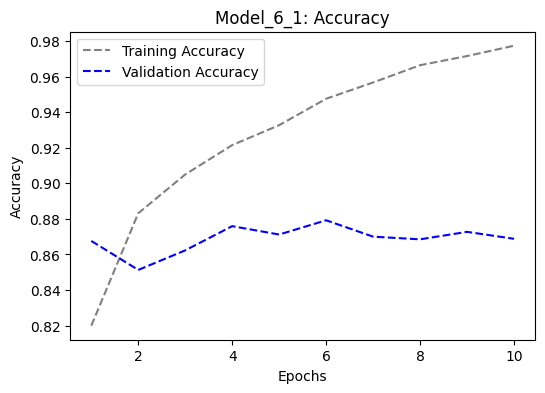

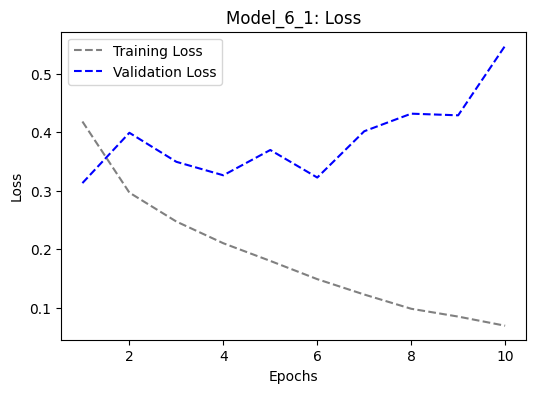

In [ ]:
import matplotlib.pyplot as plt

# Extracting the training and validation metrics from the model history
accuracy = trained_model_v61.history['accuracy']         # Training accuracy
val_accuracy = trained_model_v61.history['val_accuracy']  # Validation accuracy

loss = trained_model_v61.history["loss"]                  # Training loss
val_loss = trained_model_v61.history["val_loss"]          # Validation loss

# Creating a range for the epochs
epochs = range(1, len(accuracy) + 1)

# Plotting the Accuracy Graph
plt.figure(figsize=(6, 4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")  # Training Accuracy
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")  # Validation Accuracy
plt.title("Model_6_1: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the Loss Graph
plt.figure(figsize=(6, 4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")  # Training Loss
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")  # Validation Loss
plt.title("Model_6_1: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Loading the saved model
test_model_v61 = load_model('best_model_v6.h5')  # Load the best saved model based on previous code

# Evaluating the model on the test dataset
model6_results = test_model_v61.evaluate(test_texts, test_labels)

# Printing the results
print(f'Loss: {model6_results[0]:.3f}')
print(f'Accuracy: {model6_results[1]:.3f}')


157/157 [==============================] - 44s 278ms/step - loss: 0.5778 - accuracy: 0.8750
Loss: 0.578
Accuracy: 0.875


With different training sample sizes, we built two LSTM models with embedded layers. Because it had a larger dataset for learning and catching subtle patterns, model 6.1, which had a larger training sample size of 20,000, demonstrated better accuracy and lower loss than the other model, leading to better generalization and predictive performance.


### **Model 7 : LSTM with embedding layer and Masking enable with training sample size as 20,000**

**Model Construction** :

In [ ]:
# Input layer where each sequence is represented by integers (word indices)
inputs = keras.Input(shape=(None,), dtype="int64")

# Embedding layer that converts the input integers into dense vectors of fixed size (256). The `mask_zero=True` will handle padding tokens by masking them during training.
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256, mask_zero=True)(inputs)

# A Bidirectional LSTM layer to capture context from both directions of the sequence
x = layers.Bidirectional(layers.LSTM(32))(embedded)

# Dropout layer to reduce overfitting by randomly setting input units to 0 at each update during training
x = layers.Dropout(0.5)(x)

# Output layer with a sigmoid activation function for binary classification (e.g., spam or not spam)
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model using the input and output layers
model = keras.Model(inputs, outputs)

# Compile the model with RMSprop optimizer and binary crossentropy loss for binary classification
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Print the model summary to inspect the layers and their parameters
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_6 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,634,049
Trainable params: 2,634,049
Non-trainable params: 0
_________________________________________________

In [ ]:
# Set up the callback to save the best model based on validation loss
callbacks = ModelCheckpoint(
    filepath="model7.h5",           # Path to save the best model
    save_best_only=True,            # Save only the best model (based on val_loss)
    monitor="val_loss"              # Monitor the validation loss
)

# Train the model
Model_7 = model.fit(
    train_texts,                    # Training data
    train_labels,                   # Training labels
    epochs=10,                      # Number of epochs
    batch_size=32,                  # Batch size for gradient update
    validation_data=(val_texts, val_labels),  # Validation data and labels
    callbacks=callbacks             # Use the defined callback during training
)


Epoch 1/10
625/625 [==============================] - 51s 74ms/step - loss: 0.4486 - accuracy: 0.7846 - val_loss: 0.3163 - val_accuracy: 0.8666
Epoch 2/10
625/625 [==============================] - 44s 70ms/step - loss: 0.2855 - accuracy: 0.8855 - val_loss: 0.2930 - val_accuracy: 0.8748
Epoch 3/10
625/625 [==============================] - 45s 73ms/step - loss: 0.2321 - accuracy: 0.9082 - val_loss: 0.2955 - val_accuracy: 0.8745
Epoch 4/10
625/625 [==============================] - 45s 72ms/step - loss: 0.1905 - accuracy: 0.9293 - val_loss: 0.3213 - val_accuracy: 0.8765
Epoch 5/10
625/625 [==============================] - 44s 70ms/step - loss: 0.1570 - accuracy: 0.9435 - val_loss: 0.3353 - val_accuracy: 0.8715
Epoch 6/10
625/625 [==============================] - 44s 70ms/step - loss: 0.1259 - accuracy: 0.9560 - val_loss: 0.3789 - val_accuracy: 0.8637
Epoch 7/10
625/625 [==============================] - 44s 71ms/step - loss: 0.0969 - accuracy: 0.9660 - val_loss: 0.3976 - val_accuracy:

**Ploating the Accuracy and loss for training and validation**

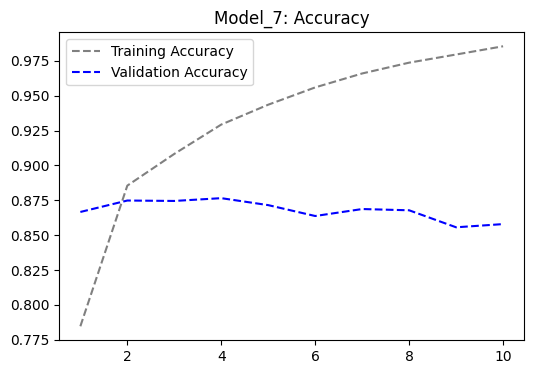

<Figure size 640x480 with 0 Axes>

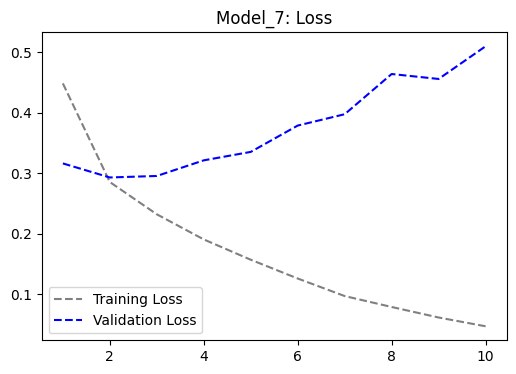

In [ ]:
# Extract accuracy and loss from Model_7 training history
accuracy = Model_7.history['accuracy']
val_accuracy = Model_7.history['val_accuracy']

loss = Model_7.history["loss"]
val_loss = Model_7.history["val_loss"]

# Set epochs range
epochs = range(1, len(accuracy) + 1)

# Plot Accuracy
plt.figure(figsize=(6, 4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model_7: Accuracy")
plt.legend()
plt.figure()

# Plot Loss
plt.figure(figsize=(6, 4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_7: Loss")
plt.legend()

# Show the plots
plt.show()


In [ ]:
# Loading the saved model
test_model = load_model('model7.h5')  # Load the best saved model

# Evaluating the model on the test dataset
Model7_Results = test_model.evaluate(test_texts, test_labels)

# Printing the loss and accuracy
print(f'Loss: {Model7_Results[0]:.3f}')
print(f'Accuracy: {Model7_Results[1]:.3f}')


157/157 [==============================] - 5s 20ms/step - loss: 0.2593 - accuracy: 0.8938
Loss: 0.259
Accuracy: 0.894


### **Model 8: Transformers with embedding layer and training sample size 20,000**

After examining LSTM models with embedding layers, convolutional networks, and one-hot encoding, transformers are still another important design to take into account. Transformers are well known for their ability to handle text and sequence data, and they are particularly good at capturing complex, distant connections within sequences. They are particularly well-suited for a variety of tasks, including sentiment analysis, question-answering, summarization, and language translation.


**Model Construction** :

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class CustomTransformerEncoder(layers.Layer):
    def __init__(self, embedding_dim, dense_dimension, number_of_heads, **kwargs):
        super().__init__(**kwargs)
        self.embedding_dim = embedding_dim
        self.dense_dimension = dense_dimension
        self.number_of_heads = number_of_heads
        self.multi_head_attention = layers.MultiHeadAttention(
            num_heads=number_of_heads, key_dim=embedding_dim)
        self.dense_projection = keras.Sequential(
            [layers.Dense(dense_dimension, activation="relu"),
             layers.Dense(embedding_dim),]
        )
        self.layer_normalization_1 = layers.LayerNormalization()
        self.layer_normalization_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        """
        Forward pass of the transformer encoder layer.

        Args:
        - inputs (tf.Tensor): Input tensor of shape (batch_size, sequence_length, embed_dim).
        - mask (tf.Tensor or None): Optional tensor for attention masking.

        Returns:
        - output (tf.Tensor): Output tensor of shape (batch_size, sequence_length, embed_dim).
        """
        # Apply attention mechanism
        if mask is not None:
            attention_mask = mask[:, tf.newaxis, :]
        attention_output = self.multi_head_attention(
            inputs, inputs, attention_mask=attention_mask)

        # Layer normalization and residual connection
        proj_input = self.layer_normalization_1(inputs + attention_output)

        # Dense projection
        proj_output = self.dense_projection(proj_input)

        # Final layer normalization and residual connection
        return self.layer_normalization_2(proj_input + proj_output)

    def get_config(self):
        """
        Custom configuration for serialization.

        Returns:
        - config (dict): Configuration dictionary containing model parameters.
        """
        config = super().get_config()
        config.update({
            "embedding_dim": self.embedding_dim,
            "number_of_heads": self.number_of_heads,
            "dense_dimension": self.dense_dimension,
        })
        return config


In [ ]:
vocabulary_size = 10000  # Define the vocabulary size
embedding_dimension = 150  # Set the embedding dimension size
num_attention_heads = 2  # Number of attention heads for the MultiHeadAttention layer
dense_layer_dim = 32  # The number of units in the dense layer
sequence_length = 150  # The maximum length of input sequences

# Define the input layer
input_layer = keras.Input(shape=(sequence_length,), dtype="int64")

# Apply an embedding layer
embedding_layer = layers.Embedding(vocabulary_size, embedding_dimension)(input_layer)

# Apply the custom transformer encoder layer
transformer_encoder = TransformerEncoder(
    embed_dim=embedding_dimension, dense_dim=dense_layer_dim, num_heads=num_attention_heads
)(embedding_layer)

# Apply a global max pooling layer to reduce sequence length
pooled_output = layers.GlobalMaxPooling1D()(transformer_encoder)

# Add a dropout layer to prevent overfitting
dropout_layer = layers.Dropout(0.5)(pooled_output)

# Add a dense layer with a sigmoid activation for binary classification
output_layer = layers.Dense(1, activation="sigmoid")(dropout_layer)

# Create the model by defining the input and output layers
model = keras.Model(input_layer, output_layer)

# Compile the model with RMSprop optimizer, binary crossentropy loss, and accuracy as the evaluation metric
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary to inspect the layers and parameters
model.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 150, 150)          1500000   
                                                                 
 transformer_encoder_1 (Tran  (None, 150, 150)         191432    
 sformerEncoder)                                                 
                                                                 
 global_max_pooling1d_1 (Glo  (None, 150)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_7 (Dropout)         (None, 150)               0         
                                                                 
 dense_16 (Dense)            (None, 1)                 151 

In [ ]:
# Ensure you have the text data and labels split correctly into training and validation sets
# Assuming you have 'train_texts', 'train_labels', 'val_texts', 'val_labels' from earlier

# Replace the variable names with correct data:
x_train_data = train_texts      # Training data (input texts)
y_train_labels = train_labels   # Training labels
x_val_data = val_texts          # Validation data (input texts)
y_val_labels = val_labels       # Validation labels

# Define the callback to save the best model based on validation loss
checkpoint_callback = ModelCheckpoint(
    filepath="best_model_v8.h5",  # Path to save the model when validation loss improves
    save_best_only=True,          # Save only the model with the best validation loss
    monitor="val_loss",           # Monitor the validation loss during training
    mode="min",                   # Save the model with the minimum validation loss
    verbose=1                     # Display a message when the model is saved
)

# Train the model using the training data and validate it with validation data
model_v8_training = model.fit(
    x_train_data,                # Training input data
    y_train_labels,              # Corresponding training labels
    epochs=10,                   # Number of epochs for training
    batch_size=32,               # Batch size for training (number of samples per gradient update)
    validation_data=(x_val_data, y_val_labels),  # Validation input and labels
    callbacks=[checkpoint_callback]  # Use the callback to save the best model during training
)


Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.4249 - accuracy: 0.8035
Epoch 1: val_loss improved from inf to 0.31543, saving model to best_model_v8.h5
625/625 [==============================] - 68s 109ms/step - loss: 0.4249 - accuracy: 0.8035 - val_loss: 0.3154 - val_accuracy: 0.8646
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.3080 - accuracy: 0.8699
Epoch 2: val_loss improved from 0.31543 to 0.29116, saving model to best_model_v8.h5
625/625 [==============================] - 67s 107ms/step - loss: 0.3080 - accuracy: 0.8699 - val_loss: 0.2912 - val_accuracy: 0.8751
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.2604 - accuracy: 0.8923
Epoch 3: val_loss did not improve from 0.29116
625/625 [==============================] - 67s 108ms/step - loss: 0.2604 - accuracy: 0.8923 - val_loss: 0.3150 - val_accuracy: 0.8725
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.2268 - accuracy: 0.9097
E

**Ploating the Accuracy and loss for training and validation**

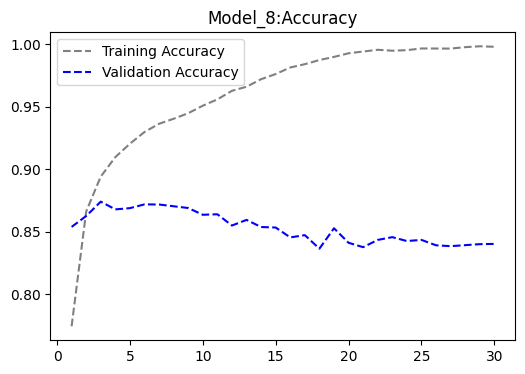

<Figure size 640x480 with 0 Axes>

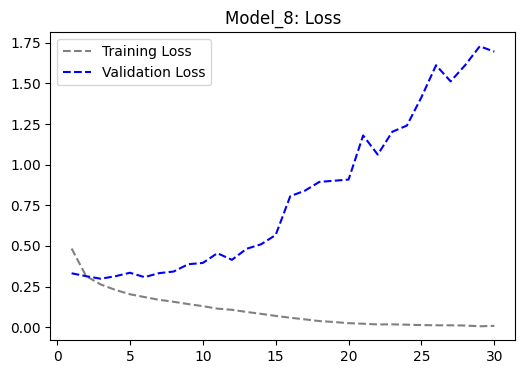

In [ ]:
accuracy = Model_8.history['accuracy']
val_accuracy = Model_8.history['val_accuracy']

loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_8:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_8: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model8.h5', custom_objects={'TransformerEncoder': TransformerEncoder})

# Evaluate the model
Model8_Results = test_model.evaluate(test_texts, test_labels)
print(f'Loss: {Model8_Results[0]:.3f}')
print(f'Accuracy: {Model8_Results[1]:.3f}')

157/157 [==============================] - 1s 5ms/step - loss: 0.2639 - accuracy: 0.8926
Loss: 0.264
Accuracy: 0.893


## **PreTrained Models**

GloVe, or Global Vectors for Word Representation, is an unsupervised learning algorithm for generating vector representations of words based on their co-occurrence statistics in large text corpora. Developed by researchers at Stanford University, GloVe aims to capture semantic relationships and meanings of words by considering their global statistical information. We are getting the data from ai.stanford.edu.

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  12.5M      0  0:00:06  0:00:06 --:--:-- 19.2M


In [ ]:
!rm -r aclImdb/train/unsup

In [ ]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
print('No. of Samples', len(texts))

No. of Samples 25000


In [ ]:
maxlen = 150  # cutting off reviews after 150 words
training_samples = 100  # training on 100 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
x_train.shape

(100, 150)

In [ ]:
x_val.shape

(10000, 150)

In [ ]:
x_test.shape

(5000, 150)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-11-27 12:05:54--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-27 12:05:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-27 12:05:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

### **Model 9:Pretrained Models with Training sample size 100- we are using GloVe model**

**Model Building** :

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 lstm_10 (LSTM)              (None, 32)                17024     
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 17,057
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
# Setting Callbacks
callbacks=callbacks = ModelCheckpoint(
            filepath= "premodel1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Pre_Model_1 =  model.fit(x_train, y_train,
                     epochs=30,
                     batch_size=32,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/30
4/4 [==============================] - 4s 562ms/step - loss: 0.6945 - accuracy: 0.5100 - val_loss: 0.6947 - val_accuracy: 0.5173
Epoch 2/30
4/4 [==============================] - 1s 352ms/step - loss: 0.6919 - accuracy: 0.5300 - val_loss: 0.6943 - val_accuracy: 0.5181
Epoch 3/30
4/4 [==============================] - 1s 348ms/step - loss: 0.6900 - accuracy: 0.5300 - val_loss: 0.6938 - val_accuracy: 0.5202
Epoch 4/30
4/4 [==============================] - 1s 349ms/step - loss: 0.6885 - accuracy: 0.5500 - val_loss: 0.6934 - val_accuracy: 0.5175
Epoch 5/30
4/4 [==============================] - 1s 366ms/step - loss: 0.6868 - accuracy: 0.5400 - val_loss: 0.6932 - val_accuracy: 0.5174
Epoch 6/30
4/4 [==============================] - 1s 368ms/step - loss: 0.6862 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.5193
Epoch 7/30
4/4 [==============================] - 1s 371ms/step - loss: 0.6839 - accuracy: 0.5600 - val_loss: 0.6929 - val_accuracy: 0.5199
Epoch 8/30
4/4 [====

**Ploating the Accuracy and loss for training and validation**

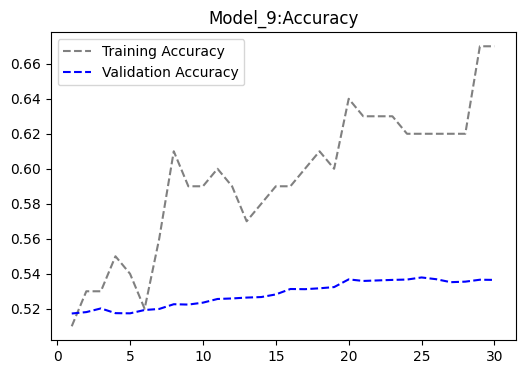

<Figure size 640x480 with 0 Axes>

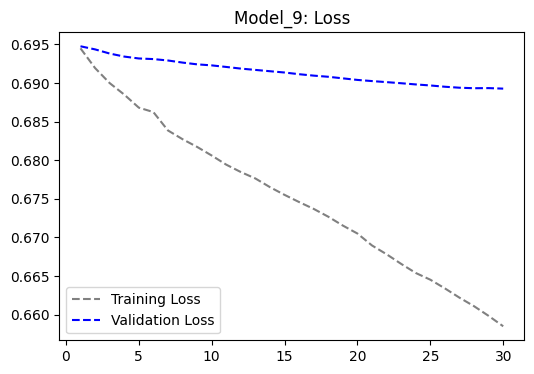

In [ ]:
accuracy = Pre_Model_1.history['accuracy']
val_accuracy = Pre_Model_1.history['val_accuracy']

loss = Pre_Model_1.history["loss"]
val_loss = Pre_Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_9:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_9: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('premodel1.keras')
PreModel1_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel1_Results[0]:.3f}')
print(f'Accuracy: {PreModel1_Results[1]:.3f}')

157/157 [==============================] - 1s 4ms/step - loss: 0.6695 - accuracy: 0.6362
Loss: 0.669
Accuracy: 0.636


### **Model 10:Pretrained Models , 4 LSTM hidden layers with Training sample size 5000**

In [ ]:
maxlen = 150  # cutting off reviews after 150 words
training_samples = 5000  # training on 1000 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
x_train.shape

(5000, 150)

In [ ]:
x_val.shape

(10000, 150)

**Model Building** :

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 lstm_15 (LSTM)              (None, 150, 512)          1255424   
                                                                 
 dropout_19 (Dropout)        (None, 150, 512)          0         
                                                                 
 lstm_16 (LSTM)              (None, 150, 256)          787456    
                                                                 
 dropout_20 (Dropout)        (None, 150, 256)          0         
                                                                 
 lstm_17 (LSTM)              (None, 150, 128)          197120    
                                                                 
 dropout_21 (Dropout)        (None, 150, 128)        

In [122]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "premodel2.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Pre_Model_2 =  model.fit(x_train, y_train,
                     epochs=40,
                     batch_size=32,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/40
157/157 [==============================] - 248s 2s/step - loss: 0.6950 - accuracy: 0.4974 - val_loss: 0.6936 - val_accuracy: 0.4987
Epoch 2/40
157/157 [==============================] - 242s 2s/step - loss: 0.6959 - accuracy: 0.4878 - val_loss: 0.6931 - val_accuracy: 0.5014
Epoch 3/40
157/157 [==============================] - 244s 2s/step - loss: 0.6954 - accuracy: 0.4866 - val_loss: 0.6933 - val_accuracy: 0.4984
Epoch 4/40
157/157 [==============================] - 241s 2s/step - loss: 0.6947 - accuracy: 0.5040 - val_loss: 0.6934 - val_accuracy: 0.4987
Epoch 5/40
157/157 [==============================] - 242s 2s/step - loss: 0.6948 - accuracy: 0.5022 - val_loss: 0.6935 - val_accuracy: 0.4987
Epoch 6/40
157/157 [==============================] - 238s 2s/step - loss: 0.6942 - accuracy: 0.4914 - val_loss: 0.6932 - val_accuracy: 0.5013
Epoch 7/40
157/157 [==============================] - 247s 2s/step - loss: 0.6943 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.4986

**Ploating the Accuracy and loss for training and validation**

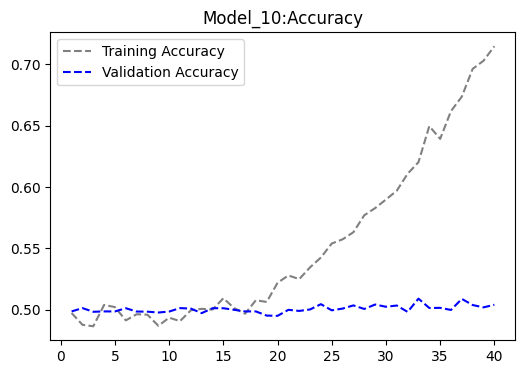

<Figure size 640x480 with 0 Axes>

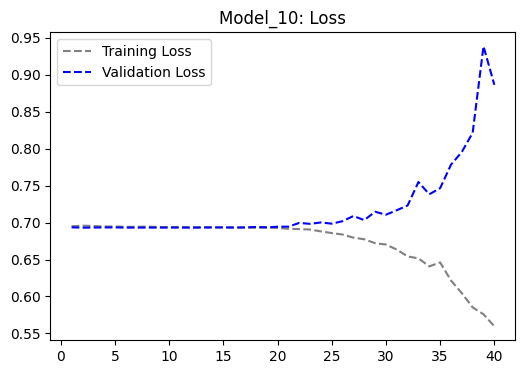

In [123]:
accuracy = Pre_Model_2.history['accuracy']
val_accuracy = Pre_Model_2.history['val_accuracy']

loss = Pre_Model_2.history["loss"]
val_loss = Pre_Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_10:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_10: Loss")
plt.legend()
plt.show()

In [124]:
test_model = load_model('premodel2.keras')
PreModel2_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel2_Results[0]:.3f}')
print(f'Accuracy: {PreModel2_Results[1]:.3f}')

157/157 [==============================] - 49s 302ms/step - loss: 0.6929 - accuracy: 0.5462
Loss: 0.693
Accuracy: 0.546


### **Model 11:Pretrained Models , 2 LSTM hidden layer with Training sample size 15000**

In [125]:
maxlen = 150  # cutting off reviews after 150 words
training_samples = 15000  # training on 10000 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [126]:
x_train.shape

(15000, 150)

In [127]:
x_val.shape

(10000, 150)

**Model Building** :

In [128]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling for the Model
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 lstm_12 (LSTM)              (None, 150, 64)           42240     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_30 (Dense)            (None, 64)                2112      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,056,833
Trainable params: 56,833
Non-

In [129]:
# putting the Callbacks
callbacks = ModelCheckpoint(
            filepath= "premodel3.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

# Fit for the Model
Pre_Model_3 =  model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=64,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/10
235/235 [==============================] - 54s 206ms/step - loss: 0.6954 - accuracy: 0.4977 - val_loss: 0.6938 - val_accuracy: 0.4978
Epoch 2/10
235/235 [==============================] - 48s 204ms/step - loss: 0.6939 - accuracy: 0.4951 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 3/10
235/235 [==============================] - 48s 203ms/step - loss: 0.6933 - accuracy: 0.4938 - val_loss: 0.6932 - val_accuracy: 0.4979
Epoch 4/10
235/235 [==============================] - 47s 201ms/step - loss: 0.6933 - accuracy: 0.5092 - val_loss: 0.6932 - val_accuracy: 0.5022
Epoch 5/10
235/235 [==============================] - 47s 202ms/step - loss: 0.6932 - accuracy: 0.5079 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 6/10
235/235 [==============================] - 47s 201ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.4977
Epoch 7/10
235/235 [==============================] - 48s 203ms/step - loss: 0.6932 - accuracy: 0.5021 - val_loss: 0.6936 - val_ac

**Ploating the Accuracy and loss for training and validation**

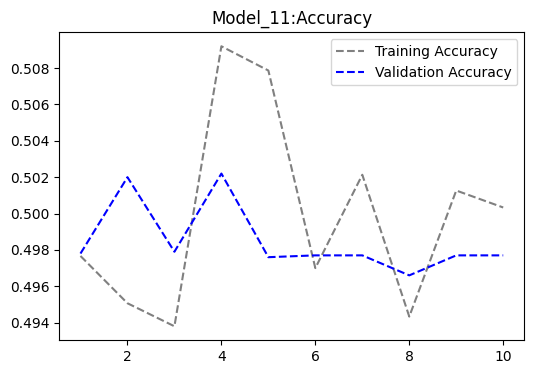

<Figure size 640x480 with 0 Axes>

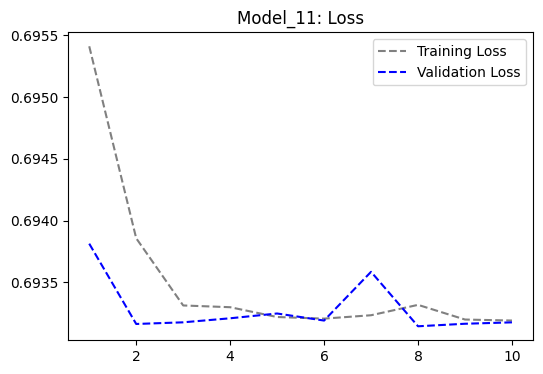

In [130]:
accuracy = Pre_Model_3.history['accuracy']
val_accuracy = Pre_Model_3.history['val_accuracy']

loss = Pre_Model_3.history["loss"]
val_loss = Pre_Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_11:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_11: Loss")
plt.legend()
plt.show()

In [131]:
test_model = load_model('premodel3.h5')
PreModel3_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel3_Results[0]:.3f}')
print(f'Accuracy: {PreModel3_Results[1]:.3f}')

157/157 [==============================] - 5s 29ms/step - loss: 0.6962 - accuracy: 0.0814
Loss: 0.696
Accuracy: 0.081


Using pre-trained GloVe embeddings and varying quantities of training data, we trained three distinct models and discovered an intriguing phenomenon. The accuracy grew as we expanded the training data. However, the accuracy decreased rather than increased when we attempted to simplify the model by using more training data and fewer LSTM hidden layers to prevent overfitting.